# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner

- 7 light


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm2/', 'dsual.h5')


Path ualm: ./data/ozm2/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp        W      VAR          VA        f      VLN        PF  \
0      1.643793e+12  15.0957 -5.94440  187.123940  50.0110  243.978  0.657079   
1      1.643793e+12  15.3969 -6.37038  207.713360  50.0106  243.925  0.638892   
2      1.643793e+12  14.7063 -5.62044  163.500422  50.0106  243.976  0.634458   
3      1.643793e+12  15.4979 -6.30862  215.112895  50.0102  243.971  0.652569   
4      1.643793e+12  15.3228 -5.62764  202.446986  50.0100  243.933  0.655938   
...             ...      ...      ...         ...      ...      ...       ...   
48511  1.643803e+12  13.3789 -6.02801  103.210865  50.0223  242.323  0.645517   
48512  1.643803e+12  12.3869 -5.94603   73.183788  50.0223  242.367  0.635764   
48513  1.643803e+12  12.4862 -5.49164   75.746262  50.0227  242.406  0.644249   
48514  1.643

[48516 rows x 8 columns]
Conversion of timestamp
                                        W       VAR         VA        f  \
2022-02-02 10:16:17.664000+01:00  7.25848 -3.885250  12.376734  50.0110   
2022-02-02 10:16:17.864000+01:00  7.37695  0.586471  12.950735  50.0106   
2022-02-02 10:16:18.064000+01:00  7.22196 -3.174690  12.222902  50.0106   
2022-02-02 10:16:18.264000+01:00  6.87873 -4.443890  10.850176  50.0102   
2022-02-02 10:16:18.464000+01:00  6.43881 -3.529630   9.318674  50.0100   
...                                   ...       ...        ...      ...   
2022-02-02 12:57:59.413000+01:00  1.56561 -2.746650   1.763242  50.0223   
2022-02-02 12:57:59.613000+01:00  4.40929 -4.172250   4.615623  50.0223   
2022-02-02 12:57:59.813000+01:00  6.10912 -3.752660   8.312802  50.0227   
2022-02-02 12:58:00.013000+01:00  5.57109 -3.783550   6.900237  50.0225   
2022-02-02 12:58:00.213000+01:00  5.92833 -3.828580   7.808245  50.0225   

                                      VLN        P

          timestamp         W       VAR        VA        f      VLN        PF  \
0      1.643793e+12  0.634897 -0.100012  1.576659  50.0083  233.361  0.075361   
1      1.643793e+12  0.501862 -0.162870  1.519634  50.0080  233.301  0.062180   
2      1.643793e+12  0.271555  0.004115  1.486595  50.0080  233.339  0.032769   
3      1.643793e+12  0.410615 -0.429794  1.439312  50.0077  233.322  0.050659   
4      1.643793e+12  0.557451 -0.178848  1.534625  50.0077  233.328  0.067945   
...             ...       ...       ...       ...      ...      ...       ...   
48512  1.643803e+12  0.560295 -0.104729  1.550661  50.0195  231.831  0.068362   
48513  1.643803e+12  0.281082 -0.404745  1.403736  50.0198  231.861  0.034377   
48514  1.643803e+12  0.132050 -0.177390  1.407178  50.0202  231.911  0.016458   
48515  1.643803e+12  0.282857 -0.134986  1.458520  50.0202  231.819  0.034948   
48516  1.643803e+12  0.092201 -0.224565  1.386307  50.0202  231.801  0.011162   

              A  
0      0.

..Reading file csv
          timestamp         W       VAR         VA        f      VLN  \
0      1.643793e+12  12.62320 -2.935850  79.430157  50.0110  243.978   
1      1.643793e+12  13.01330 -0.035278  90.933195  50.0106  243.925   
2      1.643793e+12  12.30800 -1.983870  71.211383  50.0106  243.976   
3      1.643793e+12  11.68660 -4.013200  57.413319  50.0102  243.971   
4      1.643793e+12  12.33460 -2.993800  71.869988  50.0100  243.933   
...             ...       ...       ...        ...      ...      ...   
48511  1.643803e+12   9.82598 -2.289140  30.130497  50.0223  242.323   
48512  1.643803e+12  11.03830 -3.162660  45.860758  50.0223  242.367   
48513  1.643803e+12  10.98550 -2.070190  45.030629  50.0227  242.406   
48514  1.643803e+12  11.06740 -2.472790  46.326332  50.0225  242.370   
48515  1.643803e+12  10.26000 -3.716580  35.018485  50.0225  242.350   

             PF         A  
0      0.679814  0.076108  
1      0.398720  0.133802  
2      0.527227  0.095685  
3   

Conversion of timestamp
                                        W      VAR        VA        f  \
2022-02-02 10:16:17.664000+01:00  5.07369 -3.85003  5.809157  50.0110   
2022-02-02 10:16:17.864000+01:00  4.56161 -3.78620  4.866943  50.0106   
2022-02-02 10:16:18.064000+01:00  5.58936 -3.93026  6.943495  50.0106   
2022-02-02 10:16:18.264000+01:00  5.58604 -3.49818  6.937173  50.0102   
2022-02-02 10:16:18.464000+01:00  5.16944 -3.64125  6.005668  50.0100   
...                                   ...      ...       ...      ...   
2022-02-02 12:57:59.413000+01:00  4.11969 -2.96387  4.184757  50.0223   
2022-02-02 12:57:59.613000+01:00  4.83602 -3.64499  5.351807  50.0223   
2022-02-02 12:57:59.813000+01:00  4.59219 -3.76522  4.918748  50.0227   
2022-02-02 12:58:00.013000+01:00  4.15934 -3.69509  4.236228  50.0225   
2022-02-02 12:58:00.213000+01:00  4.55367 -3.26444  4.856861  50.0225   

                                      VLN        PF         A  
2022-02-02 10:16:17.664000+01:00  2

Conversion of timestamp
                                        W       VAR        VA        f  \
2022-02-02 10:16:17.675000+01:00  3.15377 -0.320780  3.114550  50.0090   
2022-02-02 10:16:17.872000+01:00  3.01996  0.214559  3.044963  50.0083   
2022-02-02 10:16:18.069000+01:00  3.19063 -0.265590  3.156256  50.0080   
2022-02-02 10:16:18.275000+01:00  3.17792  0.009857  3.171257  50.0080   
2022-02-02 10:16:18.472000+01:00  2.92828 -0.015573  2.932795  50.0080   
...                                   ...       ...       ...      ...   
2022-02-02 12:57:59.402000+01:00  1.98335  0.100063  2.241857  50.0198   
2022-02-02 12:57:59.599000+01:00  2.50022  0.347235  2.632458  50.0202   
2022-02-02 12:57:59.796000+01:00  2.40756 -0.456279  2.456548  50.0205   
2022-02-02 12:58:00.002000+01:00  2.38157 -0.082187  2.481060  50.0205   
2022-02-02 12:58:00.199000+01:00  2.43522 -0.137954  2.513419  50.0208   

                                      VLN        PF         A  
2022-02-02 10:16:17.675

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data().head()

2022-02-02 10:16:17+01:00    15.24630
2022-02-02 10:16:18+01:00    14.94546
2022-02-02 10:16:19+01:00    15.24516
2022-02-02 10:16:20+01:00    14.94808
2022-02-02 10:16:21+01:00    15.18322
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)

### Etiquetas de dispositivos

Tenenos 7 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [9]:
 labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['M.Princ', 'M.Fan', 'M.Freezer', 'M.TV', 'M.Vac.Vlean.','M.Boieler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [14]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [15]:
boiler_meter = elec['boiler']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [16]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [17]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [18]:
boiler_meter.dominant_appliance()

Appliance(type='boiler', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [19]:
boiler_meter.total_energy() # kWh

reactive     0.007068
apparent    13.395396
active       2.001101
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [20]:
next(boiler_meter.load())

physical_quantity             power            frequency     power   current  \
type                       reactive    active             apparent             
2022-02-02 10:16:17+01:00 -0.053111  3.086865  50.008652  3.079756  0.043633   
2022-02-02 10:16:18+01:00 -0.121318  3.084544  50.007881  3.071671  0.044120   
2022-02-02 10:16:19+01:00 -0.146968  3.257280  50.007099  3.239354  0.044813   
2022-02-02 10:16:20+01:00 -0.186774  3.138292  50.006699  3.122294  0.044665   
2022-02-02 10:16:21+01:00 -0.189034  3.169228  50.006580  3.153147  0.044207   
...                             ...       ...        ...       ...       ...   
2022-02-02 12:57:56+01:00 -0.138407  2.726953  50.015633  2.746888  0.041974   
2022-02-02 12:57:57+01:00 -0.076307  2.478725  50.017300  2.557824  0.041150   
2022-02-02 12:57:58+01:00 -0.021937  2.496318  50.018665  2.579961  0.041502   
2022-02-02 12:57:59+01:00 -0.032611  2.381005  50.020073  2.499889  0.040888   
2022-02-02 12:58:00+01:00 -0.110070  2.408395  50.020653  2.497240  0.040936   

physical_quantity             voltage        pf  
type                                             
2022-02-02 10:16:17+01:00  234.110001  0.302278  
2022-02-02 10:16:18+01:00  234.119003  0.298886  
2022-02-02 10:16:19+01:00  234.113800  0.310452  
2022-02-02 10:16:20+01:00  234.115204  0.299884  
2022-02-02 10:16:21+01:00  234.050598  0.306418  
...                               ...       ...  
2022-02-02 12:57:56+01:00  232.637665  0.279337  
2022-02-02 12:57:57+01:00  232.598999  0.259083  
2022-02-02 12:57:58+01:00  232.663330  0.258434  
2022-02-02 12:57:59+01:00  232.637497  0.250005  
2022-02-02 12:58:00+01:00  232.639999  0.252894  

[9704 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [21]:
next (boiler_meter.power_series())

2022-02-02 10:16:17+01:00    3.086865
2022-02-02 10:16:18+01:00    3.084544
2022-02-02 10:16:19+01:00    3.257280
2022-02-02 10:16:20+01:00    3.138292
2022-02-02 10:16:21+01:00    3.169228
                               ...   
2022-02-02 12:57:56+01:00    2.726953
2022-02-02 12:57:57+01:00    2.478725
2022-02-02 12:57:58+01:00    2.496318
2022-02-02 12:57:59+01:00    2.381005
2022-02-02 12:58:00+01:00    2.408395
Name: (power, active), Length: 9704, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

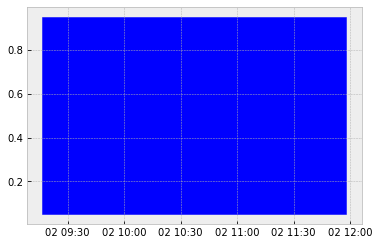

In [22]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [23]:
good_sections.combined()

[TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [24]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [25]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [26]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [27]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [28]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['frequency', 'current', 'voltage', 'power', 'pf']

In [29]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['frequency', 'current', 'voltage', 'power', 'pf']

In [30]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['frequency', 'current', 'voltage', 'power', 'pf']

In [31]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['frequency', 'current', 'voltage', 'power', 'pf']

In [32]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['frequency', 'current', 'voltage', 'power', 'pf']

In [33]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['frequency', 'current', 'voltage', 'power', 'pf']

In [34]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['frequency', 'current', 'voltage', 'power', 'pf']

## Medidas disponibles relativas a la potencia


In [35]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [36]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [37]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [38]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [39]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [40]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por appliance

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [41]:
freezer = elec['freezer']
freezer.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('power', 'apparent'),
 ('current', None),
 ('voltage', None),
 ('pf', None)]

In [42]:
boiler = elec['boiler']
boiler.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('power', 'apparent'),
 ('current', None),
 ('voltage', None),
 ('pf', None)]

In [43]:
fan = elec['fan']
fan.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('power', 'apparent'),
 ('current', None),
 ('voltage', None),
 ('pf', None)]

In [44]:
television = elec['television']
television.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('power', 'apparent'),
 ('current', None),
 ('voltage', None),
 ('pf', None)]

In [45]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('frequency', None),
 ('power', 'apparent'),
 ('current', None),
 ('voltage', None),
 ('pf', None)]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [46]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['frequency', 'current', 'voltage', 'power', 'pf']
Mediciones de Potencia disponibles - Dataset: ['reactive', 'apparent', 'active']

Medidas disponibles por cada medidor:
M.Princ: ['frequency', 'current', 'voltage', 'power', 'pf']
M.Fan: ['frequency', 'current', 'voltage', 'power', 'pf']
M.Freezer: ['frequency', 'current', 'voltage', 'power', 'pf']
M.TV: ['frequency', 'current', 'voltage', 'power', 'pf']
M.Vac.Vlean.: ['frequency', 'current', 'voltage', 'power', 'pf']
M.Boieler: ['frequency', 'current', 'voltage', 'power', 'pf']

Medidas de potencia por cada medidor:
M.Princ: ['active', 'apparent', 'reactive']
M.Fan: ['active', 'apparent', 'reactive']
M.Freezer: ['active', 'apparent', 'reactive']
M.TV: ['active', 'apparent', 'reactive']
M.Vac.Vlean.: ['active', 'apparent', 'reactive']
M.Boieler: ['active', 'apparent', 'reactive']


Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

Veamos un esquema de la red formada por los difrentes medidores

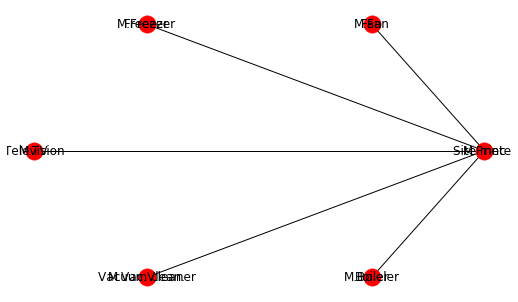

In [47]:
rcParams['figure.figsize'] = (7, 4)
fig = elec.draw_wiring_graph(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [48]:
elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [49]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:8])]
df

,M.Fan,M.Freezer,M.TV,M.Vac.Vlean.,M.Boieler
2022-02-02 10:16:00+01:00,17.954218,39.310848,18.609200,250.311172,436.930298
2022-02-02 10:17:00+01:00,43.220459,60.676174,41.796200,832.943604,1522.467896
2022-02-02 10:18:00+01:00,42.596241,58.401184,41.576984,823.910522,1507.484619
2022-02-02 10:19:00+01:00,42.179371,59.043556,41.534763,810.206299,1481.499878
2022-02-02 10:20:00+01:00,42.003288,59.041161,41.430031,812.386963,1487.745850
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,5.841594,0.308854,11.128838,4.650007,2.611770
2022-02-02 12:55:00+01:00,5.937994,0.334433,11.159833,4.660892,2.666440
2022-02-02 12:56:00+01:00,6.011952,0.252644,11.184495,4.647783,2.679903
2022-02-02 12:57:00+01:00,6.029858,0.271382,11.223354,4.623586,2.638799


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [50]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,M.Fan,M.Freezer,M.TV,M.Vac.Vlean.,M.Boieler
2022-02-02 10:16:00+01:00,-3.354744,10.773724,-4.422327,13.827636,1.511064
2022-02-02 10:17:00+01:00,-3.040452,15.653749,-9.082592,50.586582,5.480077
2022-02-02 10:18:00+01:00,-3.395517,15.130448,-9.175824,49.239399,5.371400
2022-02-02 10:19:00+01:00,-3.690959,14.724609,-9.317194,48.150627,5.222862
2022-02-02 10:20:00+01:00,-3.696784,14.797137,-9.450023,47.401402,5.275593
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,-3.618885,-0.051677,-2.688369,-3.480539,-0.208731
2022-02-02 12:55:00+01:00,-3.655366,-0.058075,-2.640547,-3.471927,-0.249659
2022-02-02 12:56:00+01:00,-3.579227,-0.032446,-2.628408,-3.466259,-0.201040
2022-02-02 12:57:00+01:00,-3.642658,-0.059790,-2.611041,-3.456803,-0.159421


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [51]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,M.Fan,M.Freezer,M.TV,M.Vac.Vlean.,M.Boieler
2022-02-02 10:16:00+01:00,1.244050e+07,inf,4.711047e+07,inf,inf
2022-02-02 10:17:00+01:00,3.519612e+06,7.401198e+09,1.998983e+06,inf,inf
2022-02-02 10:18:00+01:00,3.040145e+06,6.236346e+08,2.145365e+06,inf,inf
2022-02-02 10:19:00+01:00,2.559435e+06,7.733521e+08,2.424222e+06,inf,inf
2022-02-02 10:20:00+01:00,2.430662e+06,7.781494e+08,2.314534e+06,inf,inf
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,8.115088e+00,1.490867e+00,4.901978e+01,5.047424,2.654825
2022-02-02 12:55:00+01:00,9.680501e+00,1.496054e+00,5.061599e+01,5.069400,2.694937
2022-02-02 12:56:00+01:00,1.281587e+01,1.478277e+00,5.209932e+01,5.040105,2.710185
2022-02-02 12:57:00+01:00,1.981141e+01,1.479389e+00,5.569571e+01,5.000613,2.681170


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [52]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2022-02-02 10:16:00+01:00 to 2022-02-02 12:58:00+01:00
Freq: 60S
Data columns (total 5 columns):
(M.Fan,)           163 non-null float32
(M.Freezer,)       163 non-null float32
(M.TV,)            163 non-null float32
(M.Vac.Vlean.,)    163 non-null float32
(M.Boieler,)       163 non-null float32
dtypes: float32(5)
memory usage: 4.5 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 6(Vacuum Cleaner) con datos capturados de 16:41 a 16:46 tenemos la siguinte tabla que nos muestra todas las medidas

In [53]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2021-02-02 12:58:00+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 
df_vac

Empty DataFrame
Columns: [(power, reactive), (power, active), (frequency, ), (power, apparent), (current, ), (voltage, ), (pf, )]
Index: []

Se puede visualizar solo la cabecera de los datos

In [54]:
df_vac.head()

Empty DataFrame
Columns: [(power, reactive), (power, active), (frequency, ), (power, apparent), (current, ), (voltage, ), (pf, )]
Index: []

Vemos para el meter nº 4(Freezer) con datos capturados de 16:49 a 16:54 tenemos la siguinte tabla que nos muestra todas las medidas

In [55]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity             power             frequency      power  \
type                       reactive     active              apparent   
2022-02-02 10:16:17+01:00 -1.485564  12.818251  50.010803  85.181671   
2022-02-02 10:16:18+01:00 -2.430541  11.498740  50.010040  57.088146   
2022-02-02 10:16:19+01:00 -2.692284  11.669460  50.008980  62.961304   
2022-02-02 10:16:20+01:00 -2.812036  12.179120  50.007900  71.120605   
2022-02-02 10:16:21+01:00 -2.707204  11.600965  50.006901  59.038322   
...                             ...        ...        ...        ...   
2022-02-02 12:57:56+01:00 -2.495894  10.897380  50.018242  44.145588   
2022-02-02 12:57:57+01:00 -2.565142  10.887899  50.020142  43.652905   
2022-02-02 12:57:58+01:00 -2.370786  11.133759  50.021702  47.539242   
2022-02-02 12:57:59+01:00 -2.186770  10.865376  50.022419  43.960739   
2022-02-02 12:58:00+01:00 -3.094685  10.663700  50.022499  40.672409   

physical_quantity           current     voltage        pf  
type                                                       
2022-02-02 10:16:17+01:00  0.104955  243.951508  0.539267  
2022-02-02 10:16:18+01:00  0.097902  243.953598  0.488291  
2022-02-02 10:16:19+01:00  0.091361  243.940598  0.539092  
2022-02-02 10:16:20+01:00  0.088446  243.947998  0.592928  
2022-02-02 10:16:21+01:00  0.099596  243.883804  0.531982  
...                             ...         ...       ...  
2022-02-02 12:57:56+01:00  0.053747  242.355194  0.848906  
2022-02-02 12:57:57+01:00  0.050391  242.341797  0.891519  
2022-02-02 12:57:58+01:00  0.055415  242.386002  0.839234  
2022-02-02 12:57:59+01:00  0.063484  242.371597  0.736858  
2022-02-02 12:58:00+01:00  0.075938  242.360001  0.651972  

[9704 rows x 7 columns]

Vemos para el meter nº 2(boiler) con datos capturados de 17:00 a 17:05 tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [56]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             power            frequency      power   current  \
type                       reactive    active              apparent             
2022-02-02 10:16:17+01:00 -1.649390  7.317715  50.010803  12.663734  0.104942   
2022-02-02 10:16:18+01:00 -3.375230  6.116152  50.010040   9.043878  0.086005   
2022-02-02 10:16:19+01:00 -3.279526  6.368540  50.008980   9.708239  0.081020   
2022-02-02 10:16:20+01:00 -3.784674  7.428148  50.007900  13.195991  0.076624   
2022-02-02 10:16:21+01:00 -3.810634  6.139020  50.006901  10.359385  0.118039   
...                             ...       ...        ...        ...       ...   
2022-02-02 12:57:56+01:00 -3.421408  5.390698  50.018242   6.914558  0.054472   
2022-02-02 12:57:57+01:00 -3.691670  5.914458  50.020142   7.811794  0.034796   
2022-02-02 12:57:58+01:00 -3.425410  6.116266  50.021702   8.439908  0.054586   
2022-02-02 12:57:59+01:00 -2.832745  5.046778  50.022419   6.865804  0.099442   
2022-02-02 12:58:00+01:00 -3.806065  5.749710  50.022499   7.354241  0.035007   

physical_quantity             voltage        pf  
type                                             
2022-02-02 10:16:17+01:00  243.951508  0.458852  
2022-02-02 10:16:18+01:00  243.953598  0.405005  
2022-02-02 10:16:19+01:00  243.940598  0.472787  
2022-02-02 10:16:20+01:00  243.947998  0.507218  
2022-02-02 10:16:21+01:00  243.883804  0.387251  
...                               ...       ...  
2022-02-02 12:57:56+01:00  242.355194  0.599366  
2022-02-02 12:57:57+01:00  242.341797  0.703293  
2022-02-02 12:57:58+01:00  242.386002  0.622426  
2022-02-02 12:57:59+01:00  242.371597  0.365466  
2022-02-02 12:58:00+01:00  242.360001  0.677827  

[9704 rows x 7 columns]

Veamos para el meter nº 6(boiler) con datos capturados de 17:10 a 17:15 tenemos la siguinte tabla que nos muestra todas las medidas

In [57]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             power            frequency     power   current  \
type                       reactive    active             apparent             
2022-02-02 10:16:17+01:00 -0.053111  3.086865  50.008652  3.079756  0.043633   
2022-02-02 10:16:18+01:00 -0.121318  3.084544  50.007881  3.071671  0.044120   
2022-02-02 10:16:19+01:00 -0.146968  3.257280  50.007099  3.239354  0.044813   
2022-02-02 10:16:20+01:00 -0.186774  3.138292  50.006699  3.122294  0.044665   
2022-02-02 10:16:21+01:00 -0.189034  3.169228  50.006580  3.153147  0.044207   
...                             ...       ...        ...       ...       ...   
2022-02-02 12:57:56+01:00 -0.138407  2.726953  50.015633  2.746888  0.041974   
2022-02-02 12:57:57+01:00 -0.076307  2.478725  50.017300  2.557824  0.041150   
2022-02-02 12:57:58+01:00 -0.021937  2.496318  50.018665  2.579961  0.041502   
2022-02-02 12:57:59+01:00 -0.032611  2.381005  50.020073  2.499889  0.040888   
2022-02-02 12:58:00+01:00 -0.110070  2.408395  50.020653  2.497240  0.040936   

physical_quantity             voltage        pf  
type                                             
2022-02-02 10:16:17+01:00  234.110001  0.302278  
2022-02-02 10:16:18+01:00  234.119003  0.298886  
2022-02-02 10:16:19+01:00  234.113800  0.310452  
2022-02-02 10:16:20+01:00  234.115204  0.299884  
2022-02-02 10:16:21+01:00  234.050598  0.306418  
...                               ...       ...  
2022-02-02 12:57:56+01:00  232.637665  0.279337  
2022-02-02 12:57:57+01:00  232.598999  0.259083  
2022-02-02 12:57:58+01:00  232.663330  0.258434  
2022-02-02 12:57:59+01:00  232.637497  0.250005  
2022-02-02 12:58:00+01:00  232.639999  0.252894  

[9704 rows x 7 columns]

Veamos para el meter nº 2(Fan) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [58]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             power            frequency      power   current  \
type                       reactive    active              apparent             
2022-02-02 10:16:17+01:00 -1.649390  7.317715  50.010803  12.663734  0.104942   
2022-02-02 10:16:18+01:00 -3.375230  6.116152  50.010040   9.043878  0.086005   
2022-02-02 10:16:19+01:00 -3.279526  6.368540  50.008980   9.708239  0.081020   
2022-02-02 10:16:20+01:00 -3.784674  7.428148  50.007900  13.195991  0.076624   
2022-02-02 10:16:21+01:00 -3.810634  6.139020  50.006901  10.359385  0.118039   
...                             ...       ...        ...        ...       ...   
2022-02-02 12:57:56+01:00 -3.421408  5.390698  50.018242   6.914558  0.054472   
2022-02-02 12:57:57+01:00 -3.691670  5.914458  50.020142   7.811794  0.034796   
2022-02-02 12:57:58+01:00 -3.425410  6.116266  50.021702   8.439908  0.054586   
2022-02-02 12:57:59+01:00 -2.832745  5.046778  50.022419   6.865804  0.099442   
2022-02-02 12:58:00+01:00 -3.806065  5.749710  50.022499   7.354241  0.035007   

physical_quantity             voltage        pf  
type                                             
2022-02-02 10:16:17+01:00  243.951508  0.458852  
2022-02-02 10:16:18+01:00  243.953598  0.405005  
2022-02-02 10:16:19+01:00  243.940598  0.472787  
2022-02-02 10:16:20+01:00  243.947998  0.507218  
2022-02-02 10:16:21+01:00  243.883804  0.387251  
...                               ...       ...  
2022-02-02 12:57:56+01:00  242.355194  0.599366  
2022-02-02 12:57:57+01:00  242.341797  0.703293  
2022-02-02 12:57:58+01:00  242.386002  0.622426  
2022-02-02 12:57:59+01:00  242.371597  0.365466  
2022-02-02 12:58:00+01:00  242.360001  0.677827  

[9704 rows x 7 columns]

Veamos para el ultimo meter nº 4(TV) con datos capturados el dia 2 de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [59]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity             power            frequency     power   current  \
type                       reactive    active             apparent             
2022-02-02 10:16:17+01:00 -3.818115  4.817650  50.010803  5.338050  0.037356   
2022-02-02 10:16:18+01:00 -3.885558  5.598462  50.010040  6.991444  0.038951   
2022-02-02 10:16:19+01:00 -3.595402  5.541196  50.008980  6.873528  0.035881   
2022-02-02 10:16:20+01:00 -3.537510  5.417912  50.007900  6.584182  0.035741   
2022-02-02 10:16:21+01:00 -3.852628  5.450208  50.006901  6.634721  0.035416   
...                             ...       ...        ...       ...       ...   
2022-02-02 12:57:56+01:00 -3.338632  4.637020  50.018242  5.012159  0.029195   
2022-02-02 12:57:57+01:00 -3.363628  4.493954  50.020142  4.798400  0.030231   
2022-02-02 12:57:58+01:00 -3.607270  4.672342  50.021702  5.070971  0.030649   
2022-02-02 12:57:59+01:00 -3.440910  4.480030  50.022419  4.751081  0.029017   
2022-02-02 12:58:00+01:00 -3.479765  4.356505  50.022499  4.546545  0.032256   

physical_quantity             voltage        pf  
type                                             
2022-02-02 10:16:17+01:00  243.951508  0.531373  
2022-02-02 10:16:18+01:00  243.953598  0.593617  
2022-02-02 10:16:19+01:00  243.940598  0.634141  
2022-02-02 10:16:20+01:00  243.947998  0.623529  
2022-02-02 10:16:21+01:00  243.883804  0.631303  
...                               ...       ...  
2022-02-02 12:57:56+01:00  242.355194  0.655012  
2022-02-02 12:57:57+01:00  242.341797  0.614467  
2022-02-02 12:57:58+01:00  242.386002  0.628973  
2022-02-02 12:57:59+01:00  242.371597  0.636927  
2022-02-02 12:58:00+01:00  242.360001  0.560716  

[9704 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [60]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.6173663671801293

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [61]:
series = next(fan.power_series())
series.head()

2022-02-02 10:16:17+01:00    7.317715
2022-02-02 10:16:18+01:00    6.116152
2022-02-02 10:16:19+01:00    6.368540
2022-02-02 10:16:20+01:00    7.428148
2022-02-02 10:16:21+01:00    6.139020
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [62]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-02-02 10:16:17+01:00   -1.649390
2022-02-02 10:16:18+01:00   -3.375230
2022-02-02 10:16:19+01:00   -3.279526
2022-02-02 10:16:20+01:00   -3.784674
2022-02-02 10:16:21+01:00   -3.810634
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [63]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-02-02 10:16:17+01:00,-1.649390
2022-02-02 10:16:18+01:00,-3.375230
2022-02-02 10:16:19+01:00,-3.279526
2022-02-02 10:16:20+01:00,-3.784674
2022-02-02 10:16:21+01:00,-3.810634


Para cargar datos de voltaje:

In [64]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2022-02-02 10:16:17+01:00,243.951508
2022-02-02 10:16:18+01:00,243.953598
2022-02-02 10:16:19+01:00,243.940598
2022-02-02 10:16:20+01:00,243.947998
2022-02-02 10:16:21+01:00,243.883804


In [65]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                     
type                       reactive    active   apparent
2022-02-02 10:16:17+01:00 -1.649390  7.317715  12.663734
2022-02-02 10:16:18+01:00 -3.375230  6.116152   9.043878
2022-02-02 10:16:19+01:00 -3.279526  6.368540   9.708239
2022-02-02 10:16:20+01:00 -3.784674  7.428148  13.195991
2022-02-02 10:16:21+01:00 -3.810634  6.139020  10.359385

### Cargando especificando el tipo de CA

In [66]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-02-02 10:16:17+01:00,7.317715
2022-02-02 10:16:18+01:00,6.116152
2022-02-02 10:16:19+01:00,6.368540
2022-02-02 10:16:20+01:00,7.428148
2022-02-02 10:16:21+01:00,6.139020


### Cargando por remuestreo a un período específico

In [67]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-02-02 10:16:00+01:00,17.954218
2022-02-02 10:17:00+01:00,43.220459
2022-02-02 10:18:00+01:00,42.596241
2022-02-02 10:19:00+01:00,42.179371
2022-02-02 10:20:00+01:00,42.003288


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [68]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.6173663671801293

## Potencia activa, aparente y reactiva

In [69]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity               power              frequency current  \
type                         reactive       active       NaN     NaN   
2022-02-02 10:16:00+01:00   36.132580  1495.627930       NaN     NaN   
2022-02-02 10:17:00+01:00  119.702393  5054.710449       NaN     NaN   
2022-02-02 10:18:00+01:00  114.583961  5005.232422       NaN     NaN   
2022-02-02 10:19:00+01:00  110.476936  4926.898438       NaN     NaN   
2022-02-02 10:20:00+01:00  109.090088  4943.894531       NaN     NaN   
...                               ...          ...       ...     ...   
2022-02-02 12:53:00+01:00  -15.788887    37.224449       NaN     NaN   
2022-02-02 12:54:00+01:00  -16.266806    37.299286       NaN     NaN   
2022-02-02 12:55:00+01:00  -16.323004    37.833092       NaN     NaN   
2022-02-02 12:56:00+01:00  -16.034065    37.594604       NaN     NaN   
2022-02-02 12:57:00+01:00  -15.999358    37.590164       NaN     NaN   

physical_quantity               power voltage  pf  
type                         apparent     NaN NaN  
2022-02-02 10:16:00+01:00         inf     NaN NaN  
2022-02-02 10:17:00+01:00         inf     NaN NaN  
2022-02-02 10:18:00+01:00         inf     NaN NaN  
2022-02-02 10:19:00+01:00         inf     NaN NaN  
2022-02-02 10:20:00+01:00         inf     NaN NaN  
...                               ...     ...  ..  
2022-02-02 12:53:00+01:00  147.057755     NaN NaN  
2022-02-02 12:54:00+01:00  152.945114     NaN NaN  
2022-02-02 12:55:00+01:00  166.070633     NaN NaN  
2022-02-02 12:56:00+01:00  161.517136     NaN NaN  
2022-02-02 12:57:00+01:00  172.155014     NaN NaN  

[162 rows x 7 columns]

### Energia Total

In [70]:
elec.mains().total_energy() # returns kWh

reactive     0.066641
apparent    25.962220
active       3.363644
dtype: float64

In [71]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

6/6 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,kWh Día,kWh Sem.,Total kWh
M.Princ,29.95,209.66,3.36
M.Fan,0.57,4.00,0.06
M.Freezer,0.61,4.28,0.07
M.TV,0.63,4.39,0.07
M.Vac.Vlean.,9.81,68.67,1.10
M.Boieler,17.82,124.73,2.00


### Energia por submedidor

Veamos la energia  para el submedidor

In [72]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)"
active,0.064225,0.068685,0.070379,1.10166,2.001101
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [73]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [74]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [75]:
fraction = elec.submeters().fraction_per_meter().dropna()

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

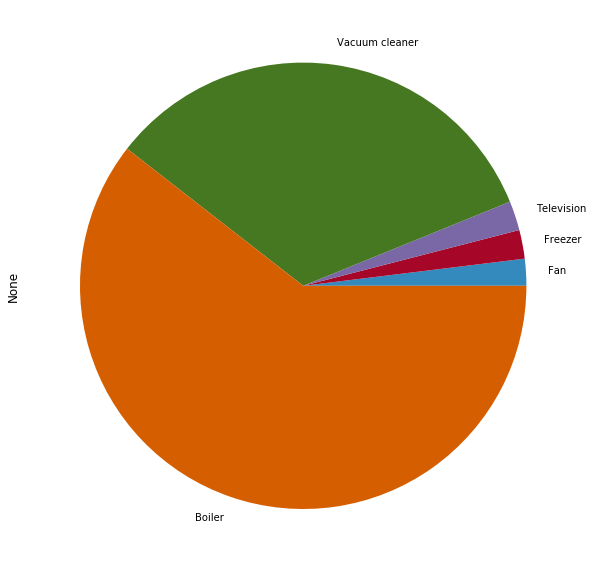

In [76]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Vacuum Cleaner

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 6 (Vacuum Cleaner).Primero veamos el timeframe.

In [77]:
vacuum_cleaner.get_timeframe()
#light.plot()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

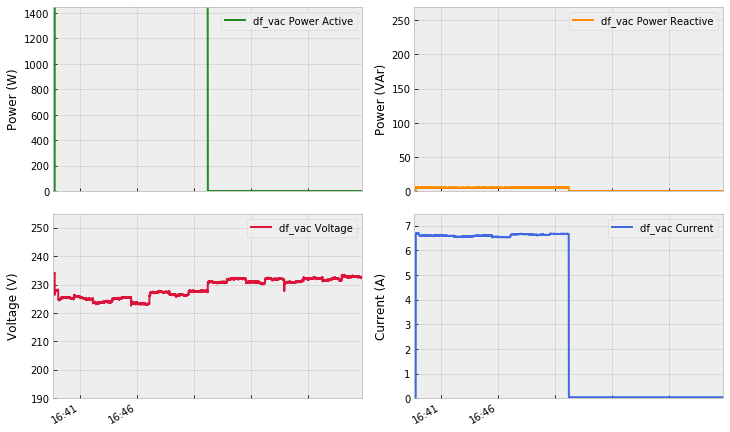

In [78]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vac['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vac['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vac['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vac['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:41','16:46'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Freezer

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

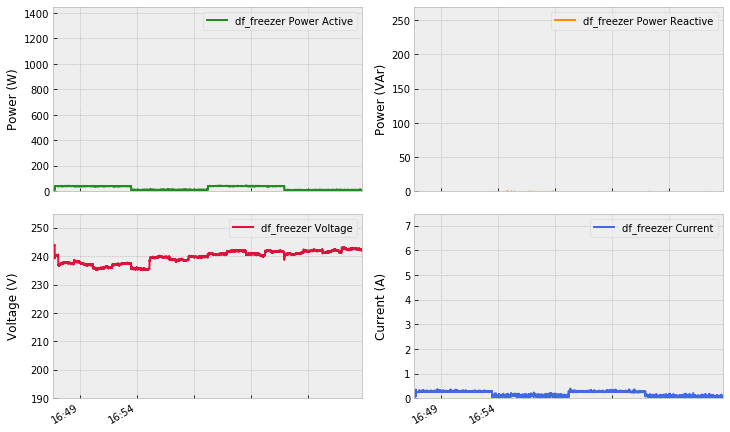

In [79]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_freezer['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_freezer['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_freezer['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_freezer['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:49','16:54'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

Una nevera esta compuesta basicamente por un compresor  y su electronica asociada,motivo por el cual vemos un pico de potencia reactiva coincidiendo con el arranque del motor con su correspondiente pico de consumo y el potencia.

### Boiler

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

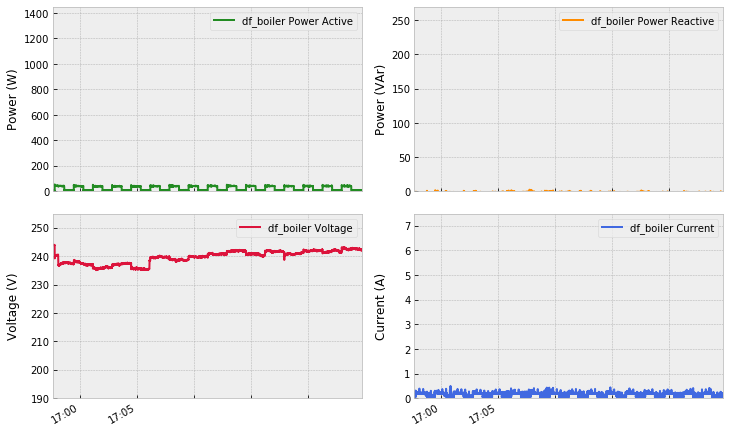

In [80]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_boiler['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_boiler['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_boiler['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_boiler['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:00','17:05'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Fan

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

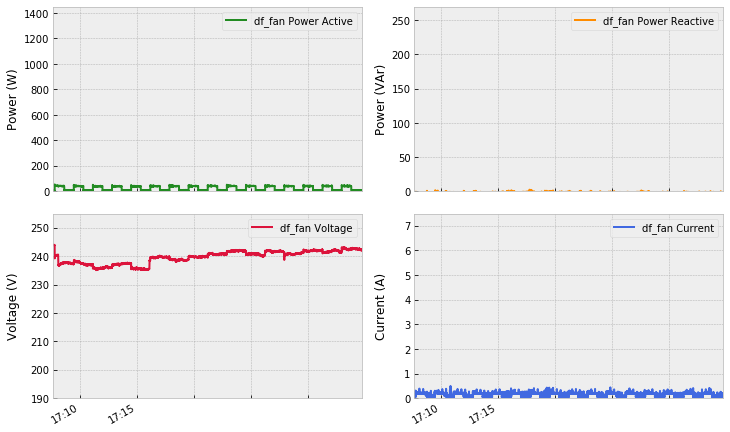

In [81]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

df_light = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_light['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_light['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_light['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_light['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:10','17:15'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_light.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

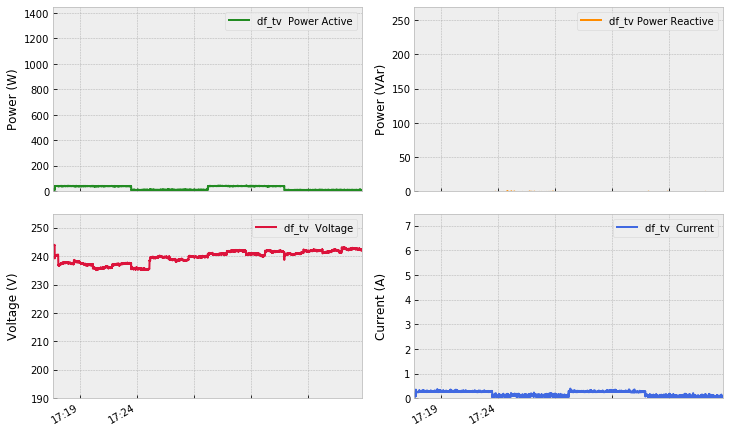

In [82]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_fan = next(elec[4].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:19','17:24'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

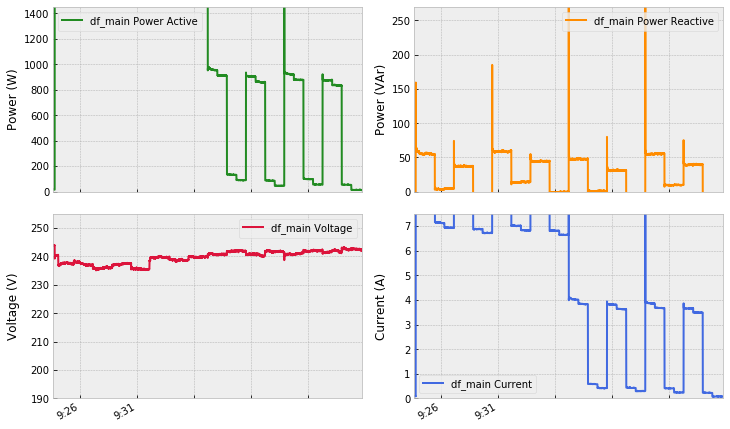

In [83]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_tv = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:26','9:31'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

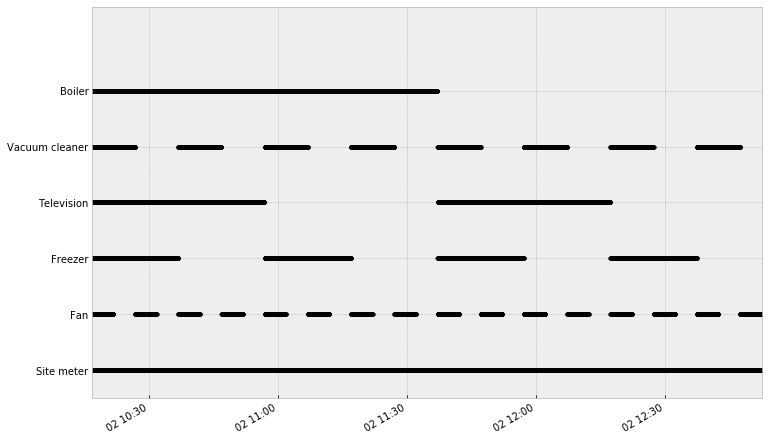

In [84]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

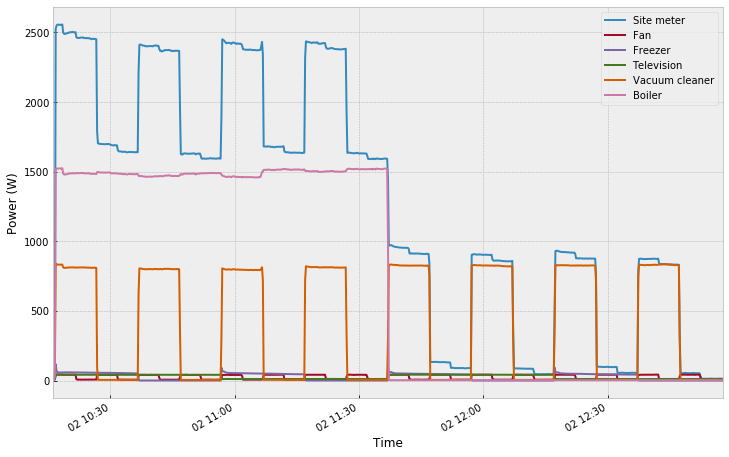

In [85]:
dsualm.set_window(start='2022-02-02', end='2022-02-03')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [86]:
from pandas.plotting import autocorrelation_plot

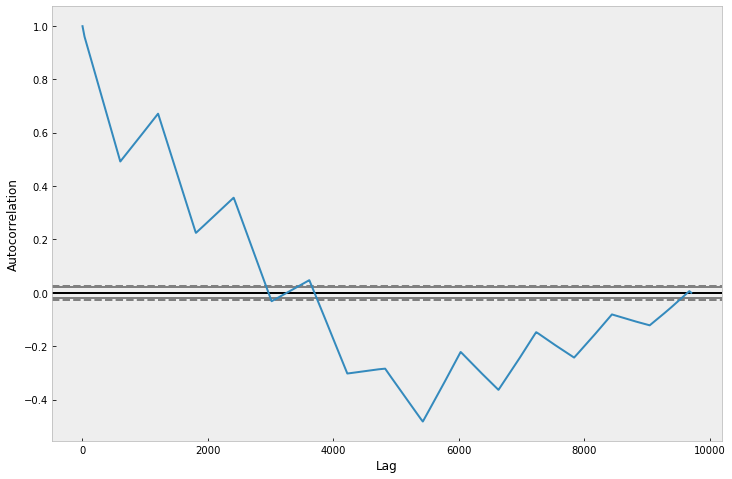

In [87]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [88]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

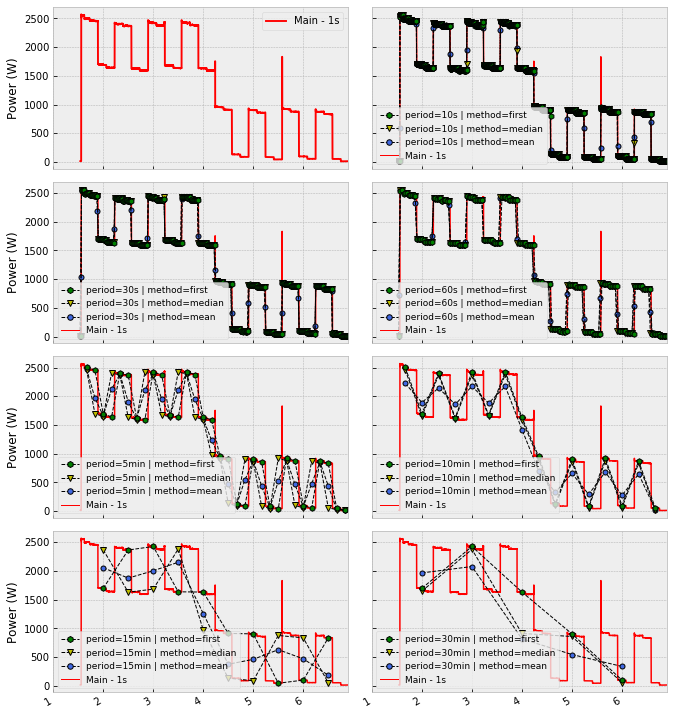

In [89]:
rcParams['figure.figsize'] = (11, 14)

#t0 = '2021-11-10 18:00:00+01:00'
#t1 = '2021-11-12 18:05:00+01:00'

t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-02-02 10:00:00+01:00','2022-02-02 12:57:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [90]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

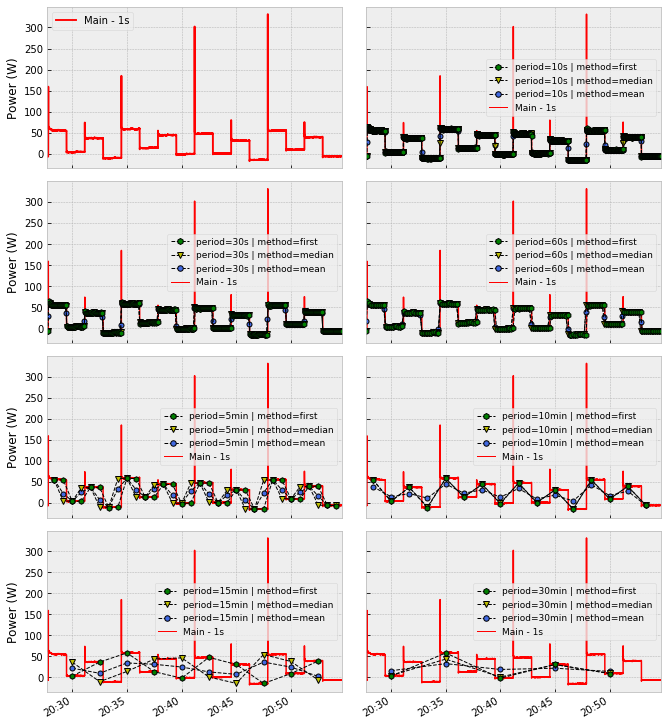

In [92]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass

Marcadores: 
- https://matplotlib.org/3.1.0/api/markers_api.html

Colores:
- https://matplotlib.org/api/colors_api.html?highlight=colors#module-matplotlib.colors
- https://matplotlib.org/3.1.0/gallery/color/named_colors.html